## Rain Prediction in Australia

Predicting whether or not rain will occur tomorrow. Dataset acquired from kaggle (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?rvi=1).

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df=pd.read_csv('weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.shape

(145460, 23)

## Data Preprocessing

### Missing Values

<AxesSubplot:>

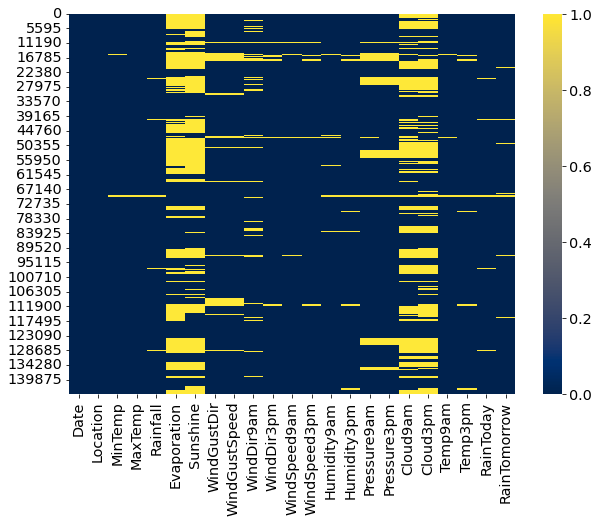

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isna(), cmap='cividis')

In [8]:
cols=df.columns

In [9]:
def misval_perc(df, cols):
    for i in cols:
        print('Missing values in {} : {}%'.format(i,round(((df[i].isna().sum()*100)/df.shape[0]),2)))

In [10]:
print('Missing Values Percentage each columns \n')
misval_perc(df,cols)

Missing Values Percentage each columns 

Missing values in Date : 0.0%
Missing values in Location : 0.0%
Missing values in MinTemp : 1.02%
Missing values in MaxTemp : 0.87%
Missing values in Rainfall : 2.24%
Missing values in Evaporation : 43.17%
Missing values in Sunshine : 48.01%
Missing values in WindGustDir : 7.1%
Missing values in WindGustSpeed : 7.06%
Missing values in WindDir9am : 7.26%
Missing values in WindDir3pm : 2.91%
Missing values in WindSpeed9am : 1.21%
Missing values in WindSpeed3pm : 2.11%
Missing values in Humidity9am : 1.82%
Missing values in Humidity3pm : 3.1%
Missing values in Pressure9am : 10.36%
Missing values in Pressure3pm : 10.33%
Missing values in Cloud9am : 38.42%
Missing values in Cloud3pm : 40.81%
Missing values in Temp9am : 1.21%
Missing values in Temp3pm : 2.48%
Missing values in RainToday : 2.24%
Missing values in RainTomorrow : 2.25%


We have a lot of missing columns in Evaporation, Sunshine, Cloud9am, and Cloud3pm columns. The missing value percentages in these columns are too high, so these columns might not give us any useful information. We probably would have to drop them.

In [11]:
df2=df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [12]:
df2.shape

(145460, 19)

For the missing values in the other columns, we are going to impute them with median.

In [13]:
df2.fillna(df2.median(), inplace=True)

In [14]:
df2.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

There are still missing values in some categorical data. We're going to impute them with mode.

In [15]:
miss=['WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [16]:
def misval(df, col):
    for i in col:
        df[i].fillna(df[i].mode()[0], inplace=True)

In [17]:
misval(df2, miss)

In [18]:
df2.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [19]:
df2.shape

(145460, 19)

Notice that there are still some missing values in the target column. For this case, we're going to drop it.

In [20]:
df2.dropna(inplace=True)

In [21]:
df2.shape

(142193, 19)

### Check for Duplicates

In [22]:
df2.duplicated().sum()

0

There is no duplicated data.

Separating the numerical columns.

In [23]:
cats=list(df2.select_dtypes('object').columns)
nums=list(df2.select_dtypes('number').columns)
cats.remove('RainTomorrow')

In [24]:
len(nums)

12

### Handling the Outliers

Now we're gonna check the outliers in the features.

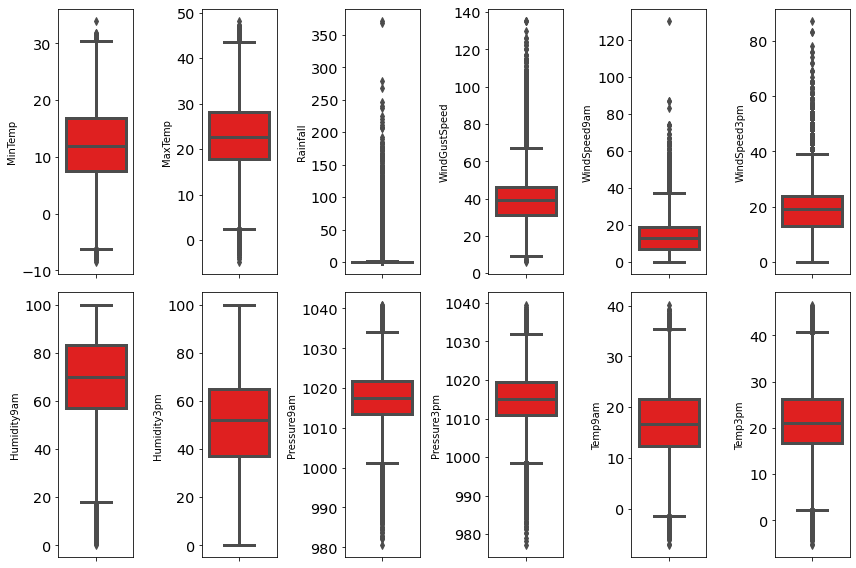

In [25]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.boxplot(y=df2[nums[i]], color='red', orient='v')
    plt.tight_layout()

Notice that we have significant outliers in the features. What we're gonna do is replace those outliers with its upper/lower fence using IQR method.

In [26]:
print(f'Row number before replacing outliers: {len(df2)}')

filtered_entries = np.array([True] * len(df))
for col in nums:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

 # Filtering outlier & replace with upper_bound or lower_bound karena outliers > 27,5%
    df2[col] = np.where(df2[col] >= high_limit,
                         high_limit, df2[col])
    df2[col] = np.where(df2[col] <= low_limit,
                         low_limit, df2[col])

print(f'Row number after replacing outliers: {len(df2)}')

Row number before replacing outliers: 142193
Row number after replacing outliers: 142193


The row number is still the same meaning we do not lose any data.

The distributions of the numerical features after replacing outliers are as follows.

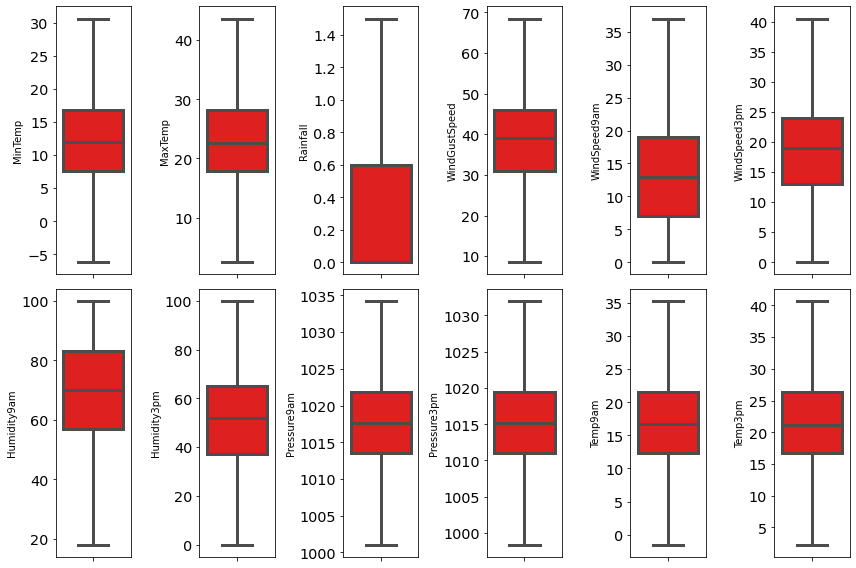

In [27]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.boxplot(y=df2[nums[i]], color='red', orient='v')
    plt.tight_layout()

We can see that we no longer have outliers in our features.

### Normalization/Standardization

For this case, we're going to normalize the 'Rainfall' column and standardize the remaining columns.

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [29]:
for i in nums:
    if i =='Rainfall':
        df2[i]=MinMaxScaler().fit_transform(df2[i].values.reshape(len(df2), 1))
    else:
        df2[i]=StandardScaler().fit_transform(df2[i].values.reshape(len(df2), 1))

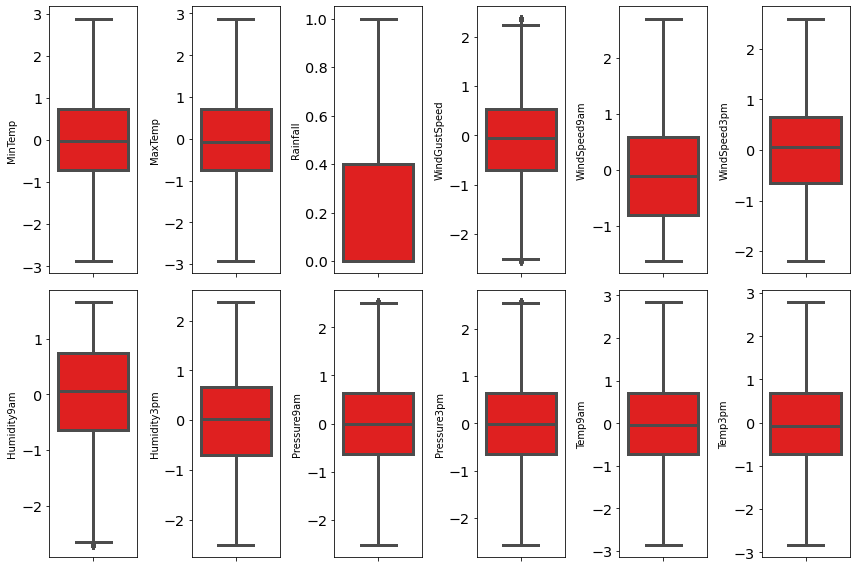

In [30]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.boxplot(y=df2[nums[i]], color='red', orient='v')
    plt.tight_layout()

### Feature Engineering

In [31]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.190084,-0.046323,0.400000,W,0.360385,W,WNW,0.712937,0.644267,0.111240,-1.436563,-1.514865,-1.246471,-0.013404,0.017781,No,No
1,2008-12-02,Albury,-0.749182,0.263885,0.000000,WNW,0.360385,NNW,WSW,-1.158097,0.407503,-1.326534,-1.290451,-1.074479,-1.139674,0.033005,0.383367,No,No
2,2008-12-03,Albury,0.111812,0.348487,0.000000,WSW,0.524300,W,WSW,0.595997,0.881031,-1.646039,-1.046931,-1.530050,-1.002364,0.620859,0.222509,No,No
3,2008-12-04,Albury,-0.467402,0.672795,0.000000,NE,-1.278766,SE,E,-0.339520,-1.131460,-1.273283,-1.728788,-0.011479,-0.376839,0.172234,0.705083,No,No
4,2008-12-05,Albury,0.831916,1.279110,0.666667,W,0.114512,ENE,NW,-0.807278,0.170740,0.697000,-0.900818,-1.044107,-1.414295,0.125824,1.173033,No,No


Turn the RainToday and RainTomorrow columns into numerical columns (Yes=1, No=0).

In [32]:
df2['RainToday']=df2['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df2['RainTomorrow']=df2['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [33]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.190084,-0.046323,0.400000,W,0.360385,W,WNW,0.712937,0.644267,0.111240,-1.436563,-1.514865,-1.246471,-0.013404,0.017781,0,0
1,2008-12-02,Albury,-0.749182,0.263885,0.000000,WNW,0.360385,NNW,WSW,-1.158097,0.407503,-1.326534,-1.290451,-1.074479,-1.139674,0.033005,0.383367,0,0
2,2008-12-03,Albury,0.111812,0.348487,0.000000,WSW,0.524300,W,WSW,0.595997,0.881031,-1.646039,-1.046931,-1.530050,-1.002364,0.620859,0.222509,0,0
3,2008-12-04,Albury,-0.467402,0.672795,0.000000,NE,-1.278766,SE,E,-0.339520,-1.131460,-1.273283,-1.728788,-0.011479,-0.376839,0.172234,0.705083,0,0
4,2008-12-05,Albury,0.831916,1.279110,0.666667,W,0.114512,ENE,NW,-0.807278,0.170740,0.697000,-0.900818,-1.044107,-1.414295,0.125824,1.173033,0,0


For now, we're just gonna leave the features as it is.

We're going to do some initial feature selection by looking at the correlation heatmap. Features which correlation with the target column <0.1 will be dropped.

<AxesSubplot:>

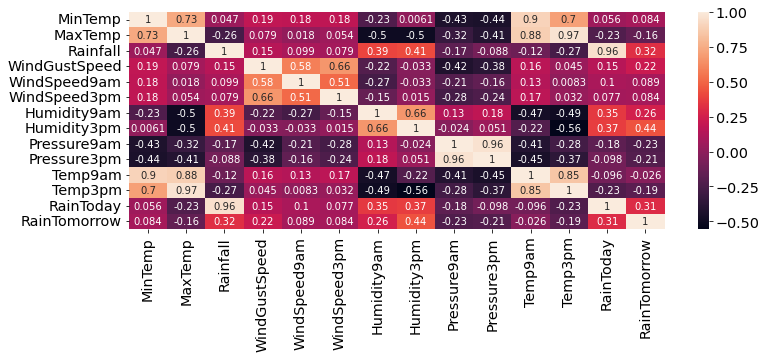

In [34]:
sns.heatmap(df2.corr(), annot=True)

According to the rules above, now we drop the following columns :MinTemp, WindSpeed9am, WindSpeed3am, Temp9am.

In [35]:
df2.drop(['MinTemp','WindSpeed9am','WindSpeed3pm','Temp9am'], axis=1, inplace=True)

Notice that some features have a high correlation value with another feature. We need to drop one of those highly correlated columns to avoid multicollinearity.

In [36]:
df2.drop(['Temp3pm','Rainfall','Pressure9am'], axis=1, inplace=True)

Next, we're going to encode the categorical columns. Before that, we're going to drop the Location column since it contains too many unique values. We're also going to drop the date column since it doesn't really give us any information.

In [37]:
df2.drop(['Date','Location'], axis=1, inplace=True)

In [38]:
df2.head()

,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,-0.046323,W,0.360385,W,WNW,0.111240,-1.436563,-1.246471,0,0
1,0.263885,WNW,0.360385,NNW,WSW,-1.326534,-1.290451,-1.139674,0,0
2,0.348487,WSW,0.524300,W,WSW,-1.646039,-1.046931,-1.002364,0,0
3,0.672795,NE,-1.278766,SE,E,-1.273283,-1.728788,-0.376839,0,0
4,1.279110,W,0.114512,ENE,NW,0.697000,-0.900818,-1.414295,0,0


One-hot encode the categorical columns.

In [39]:
df2=pd.get_dummies(df2, drop_first=True)

In [40]:
df2.shape

(142193, 52)

### Class Imbalance

In [41]:
df2['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

We can see that the classes in target column is heavily imbalanced. We're gonna handle this in 3 ways: Undersampling, Oversampling, and Oversampling using SMOTE. Then we're going to compare the performances of each sampling technique.

In [42]:
X=df2.drop('RainTomorrow', axis=1)
y=df2['RainTomorrow']

In [43]:
from imblearn import under_sampling, over_sampling

X_under, y_under = under_sampling.RandomUnderSampler(random_state=101).fit_resample(X,y)
X_over, y_over = over_sampling.RandomOverSampler(random_state=101).fit_resample(X,y)
X_smote, y_smote = over_sampling.SMOTE(random_state=101).fit_resample(X,y)

In [44]:
print('Undersampled')
print(pd.Series(y_under).value_counts())
print('Oversampled')
print(pd.Series(y_over).value_counts())
print('SMOTE Oversampled')
print(pd.Series(y_smote).value_counts())

Undersampled
0    31877
1    31877
Name: RainTomorrow, dtype: int64
Oversampled
0    110316
1    110316
Name: RainTomorrow, dtype: int64
SMOTE Oversampled
0    110316
1    110316
Name: RainTomorrow, dtype: int64


## Modeling

### Import ML Algorithms

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [46]:
lrc=LogisticRegression()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()

### Import RandomizedSearchCV for Hyperparameter Tuning

In [47]:
from sklearn.model_selection import  RandomizedSearchCV

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, proba, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, proba, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

#### Undersampled Data

In [49]:
from sklearn.model_selection import train_test_split
X_train_under, X_test_under,  y_train_under ,y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=101)

In [50]:
models = {
    "Logistic"     : LogisticRegression(),
    "KNN"      : KNeighborsClassifier(),
    "RandomForest"      : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_under, y_train_under)
    y_pred = model.predict(X_test_under)
    y_proba = model.predict_proba(X_test_under)
    y_proba = y_proba[:,1]
    print("Evaluate model: {}".format(model_name))
    print(eval_classification(model, y_pred, y_proba, X_train_under, y_train_under, X_test_under, y_test_under), "\n")

Evaluate model: Logistic
Accuracy (Test Set): 0.77
Precision (Test Set): 0.77
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
AUC: 0.85
None 

Evaluate model: KNN
Accuracy (Test Set): 0.75
Precision (Test Set): 0.76
Recall (Test Set): 0.72
F1-Score (Test Set): 0.74
AUC: 0.81
None 

Evaluate model: RandomForest
Accuracy (Test Set): 0.78
Precision (Test Set): 0.78
Recall (Test Set): 0.76
F1-Score (Test Set): 0.77
AUC: 0.86
None 

[13:30:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Evaluate model: XGBoost
Accuracy (Test Set): 0.78
Precision (Test Set): 0.78
Recall (Test Set): 0.77
F1-Score (Test Set): 0.78
AUC: 0.86
None 



We're going to perform an overfitting check on each model.

In [51]:
for model_name, model in models.items():
    print("Overfitting check: {}".format(model_name))
    print('Train score {}'.format(model.score(X_train_under, y_train_under)))
    print('Test score {}'.format(model.score(X_test_under, y_test_under)))

Overfitting check: Logistic
Train score 0.7714388150671119
Test score 0.7670308987295447
Overfitting check: KNN
Train score 0.8298563649808411
Test score 0.7456997960997542
Overfitting check: RandomForest
Train score 0.9998879602034643
Test score 0.7779578606158833
Overfitting check: XGBoost
Train score 0.836578752772985
Test score 0.7792126313588121


So from the undersampled data, the recommended model is <b>XGBoost</b> with <b>auc score = 0.86</b>. Random forest performed is a close second but the model is overfitting.

#### Oversampled Data

In [52]:
X_train_over, X_test_over,  y_train_over ,y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state=101)

In [53]:
models = {
    "Logistic"     : LogisticRegression(),
    "KNN"      : KNeighborsClassifier(),
    "RandomForest"      : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test_over)
    y_proba = model.predict_proba(X_test_over)
    y_proba = y_proba[:,1]
    print("Evaluate model: {}".format(model_name))
    print(eval_classification(model, y_pred, y_proba, X_train_over, y_train_over, X_test_over, y_test_over), "\n")

Evaluate model: Logistic
Accuracy (Test Set): 0.77
Precision (Test Set): 0.78
Recall (Test Set): 0.76
F1-Score (Test Set): 0.77
AUC: 0.85
None 

Evaluate model: KNN
Accuracy (Test Set): 0.80
Precision (Test Set): 0.78
Recall (Test Set): 0.85
F1-Score (Test Set): 0.81
AUC: 0.88
None 

Evaluate model: RandomForest
Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.97
F1-Score (Test Set): 0.93
AUC: 0.98
None 

[13:46:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Evaluate model: XGBoost
Accuracy (Test Set): 0.81
Precision (Test Set): 0.81
Recall (Test Set): 0.81
F1-Score (Test Set): 0.81
AUC: 0.89
None 



Overfitting check.

In [54]:
for model_name, model in models.items():
    print("Overfitting check: {}".format(model_name))
    print('Train score {}'.format(model.score(X_train_over, y_train_over)))
    print('Test score {}'.format(model.score(X_test_over, y_test_over)))

Overfitting check: Logistic
Train score 0.769214332888722
Test score 0.7680465327088684
Overfitting check: KNN
Train score 0.8738879320392121
Test score 0.8045626227526816
Overfitting check: RandomForest
Train score 0.9998510767796325
Test score 0.9321951956488895
Overfitting check: XGBoost
Train score 0.825630333717512
Test score 0.8068439341290226


For the undersampled data, the recommended model is <b>Random Forest</b> with <b>auc score 0.98</b>.

#### SMOTE Oversampled Data

In [55]:
X_train_smote, X_test_smote,  y_train_smote ,y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=101)

In [56]:
models = {
    "Logistic"     : LogisticRegression(),
    "KNN"      : KNeighborsClassifier(),
    "RandomForest"      : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_smote)
    y_proba = model.predict_proba(X_test_smote)
    y_proba = y_proba[:,1]
    print("Evaluate model: {}".format(model_name))
    print(eval_classification(model, y_pred, y_proba, X_train_smote, y_train_smote, X_test_smote, y_test_smote), "\n")

Evaluate model: Logistic
Accuracy (Test Set): 0.79
Precision (Test Set): 0.80
Recall (Test Set): 0.78
F1-Score (Test Set): 0.79
AUC: 0.87
None 

Evaluate model: KNN
Accuracy (Test Set): 0.83
Precision (Test Set): 0.78
Recall (Test Set): 0.92
F1-Score (Test Set): 0.84
AUC: 0.91
None 

Evaluate model: RandomForest
Accuracy (Test Set): 0.88
Precision (Test Set): 0.88
Recall (Test Set): 0.90
F1-Score (Test Set): 0.89
AUC: 0.95
None 

[14:25:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Evaluate model: XGBoost
Accuracy (Test Set): 0.89
Precision (Test Set): 0.92
Recall (Test Set): 0.86
F1-Score (Test Set): 0.89
AUC: 0.96
None 



Overfitting check.

In [58]:
for model_name, model in models.items():
    print("Overfitting check: {}".format(model_name))
    print('Train score {}'.format(model.score(X_train_smote, y_train_smote)))
    print('Test score {}'.format(model.score(X_test_smote, y_test_smote)))

Overfitting check: Logistic
Train score 0.7899340852876808
Test score 0.7895301405046079
Overfitting check: KNN
Train score 0.884895300501159
Test score 0.8300951805408672
Overfitting check: RandomForest
Train score 0.9998769764701312
Test score 0.8836380117842575
Overfitting check: XGBoost
Train score 0.9039833723986999
Test score 0.8912826710983532


### Best Model

Based on modeling performance above, the best model is <b> Random Forest</b> with <b>oversampled data</b>.